# Chapter 6: Deep Learning for text and sequences

## 6.1 Working with text data

In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

one-hot vector in word units.

In [2]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10

results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [3]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

one-hot vector in character units.

In [4]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [5]:
results.shape

(2, 50, 101)

Use Tokenizer class in keras for tokenization.

In [6]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [7]:
results.shape

(2, 50, 101)

hashing one-hot encoding.

In [8]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [9]:
results.shape

(2, 10, 1000)

Embedding: train the whole layers including embedding layer.

In [10]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [11]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 105us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 76us/step - loss:

Use pre-trained embeddings.

In [13]:
import os

imdb_data = "../data/aclImdb_v1.tar.gz"

if not os.path.exists(imdb_data):
    !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P ../data/
    !tar -zxvf ../data/aclImdb_v1.tar.gz -C ../data/
else:
    print("Data already exists.")

Data already exists.


In [14]:
imdb_dir = '../data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


Download a pre-trained embedding.

In [16]:
glove6B = "../data/glove.6B.zip"

if not os.path.exists(glove6B):
    !wget http://nlp.stanford.edu/data/glove.6B.zip -P ../data/
    !unzip {glove6B} -d ../data/
else:
    print("Data already exists.")

--2018-03-26 16:15:38--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-03-26 16:15:39--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘../data/glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  24.7MB/s    in 54s     

2018-03-26 16:16:33 (15.3 MB/s) - ‘../data/glove.6B.zip’ saved [862182613/862182613]

Archive:  ../data/glove.6B.zip
  inflating: ../data/glove.6B.50d.txt  
  inflating: ../data/glove.6B.100d.txt  
  inflating: ../data/glove.6B.200d.txt  
  inflating: ../data/glove.6B.300d.txt  


In [17]:
glove_dir = '../data/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [18]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Define a model.

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


Load the pre-trained weight.

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Training.

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('../model/pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.7600 - acc: 0.5100 - val_loss: 0.7911 - val_acc: 0.5135
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5356 - acc: 0.7050 - val_loss: 0.6889 - val_acc: 0.5612
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4954 - acc: 0.7950 - val_loss: 0.6887 - val_acc: 0.5642
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2627 - acc: 0.9450 - val_loss: 0.7701 - val_acc: 0.5440
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2943 - acc: 0.8650 - val_loss: 0.7350 - val_acc: 0.5538
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1869 - acc: 0.9550 - val_loss: 0.6863 - val_acc: 0.5736
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1066 - acc: 1.0000 - val_loss: 0.9500 - val_acc: 0.5197
Epoch 8/10
200/200 [========

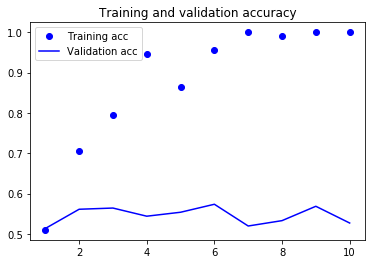

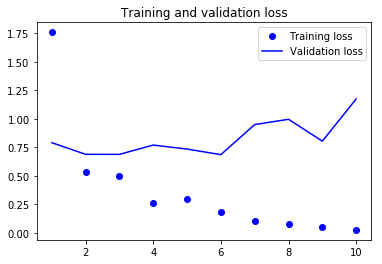

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Train the whole layers.

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6884 - acc: 0.5000 - val_loss: 0.6989 - val_acc: 0.5199
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4848 - a

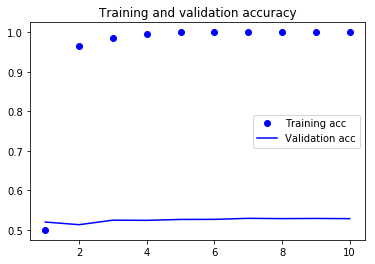

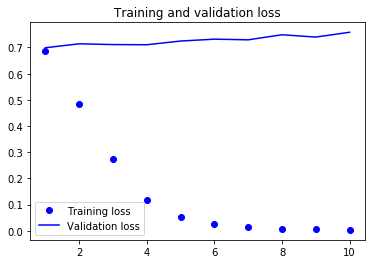

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the trained model.

In [25]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [26]:
model.load_weights('../model/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 43us/step


[1.1946243684959412, 0.52188]

[loss, accuracy]

## 6.2 Understanding recurrent neural networks

In [1]:
import keras

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import SimpleRNN

Modling using simpleRNN.

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6443 - acc: 0.6126 - val_loss: 0.6023 - val_acc: 0.6612
Epoch 2/10
20000/20000 [==============================] - 17s 856us/step - loss: 0.4171 - acc: 0.8207 - val_loss: 0.4248 - val_acc: 0.8220
Epoch 3/10
20000/20000 [==============================] - 17s 866us/step - loss: 0.3067 - acc: 0.8773 - val_loss: 0.4584 - val_acc: 0.7856
Epoch 4/10
20000/20000 [==============================] - 17s 855us/step - loss: 0.2306 - acc: 0.9088 - val_loss: 0.4201 - val_acc: 0.8244
Epoch 5/10
20000/20000 [==============================] - 17s 850us/step - loss: 0.1668 - acc: 0.9360 - val_loss: 0.4560 - val_acc: 0.8074
Epoch 6/10
20000/20000 [==============================] - 17s 858us/step - loss: 0.1677 - acc: 0.9385 - val_loss: 0.4375 - val_acc: 0.8288
Epoch 7/10
20000/20000 [==============================] - 17s 850us/step - loss: 0.0815 - acc: 0.9738 - val_loss: 0.510

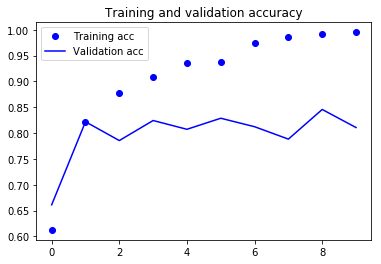

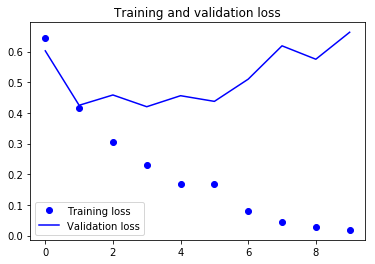

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Use LSTM.

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5090 - acc: 0.7616 - val_loss: 0.3369 - val_acc: 0.8638
Epoch 2/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.2945 - acc: 0.8825 - val_loss: 0.3809 - val_acc: 0.8364
Epoch 3/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2312 - acc: 0.9116 - val_loss: 0.2720 - val_acc: 0.8954
Epoch 4/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1952 - acc: 0.9290 - val_loss: 0.4869 - val_acc: 0.8436
Epoch 5/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1741 - acc: 0.9367 - val_loss: 0.3168 - val_acc: 0.8854
Epoch 6/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1546 - acc: 0.9442 - val_loss: 0.2926 - val_acc: 0.8882
Epoch 7/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.1442 - acc: 0.9485 - val_loss: 0.3733 - val_acc:

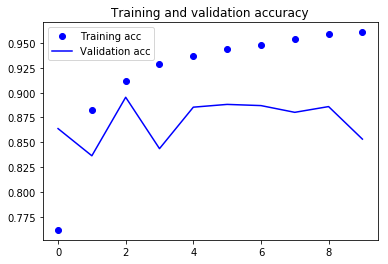

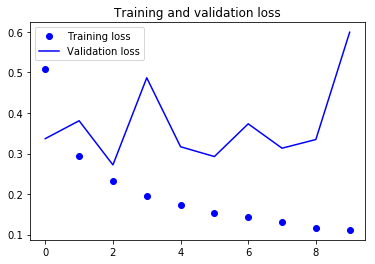

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 6.3 Advanced usage of recurrent neural networks

In [11]:
import keras

Download a climate data.

In [12]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip -P ../data/
!unzip ../data/jena_climate_2009_2016.csv.zip -d ../data/

--2018-03-27 15:27:09--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.179
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘../data/jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  2.45MB/s    in 11s     

2018-03-27 15:27:21 (1.20 MB/s) - ‘../data/jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  ../data/jena_climate_2009_2016.csv.zip
  inflating: ../data/jena_climate_2009_2016.csv  


In [13]:
import os

data_dir = '../data/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [14]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

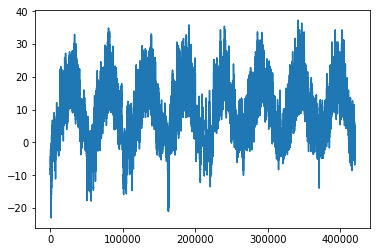

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

temp = float_data[:, 1]  # temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)
plt.show()

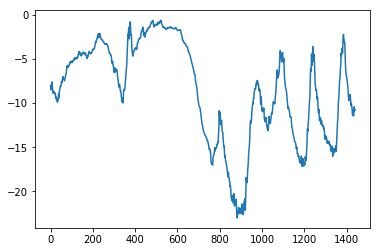

In [16]:
plt.plot(range(1440), temp[:1440])
plt.show()

Data preprocessings.

In [17]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [18]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [19]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size

test_steps = (len(float_data) - 300001 - lookback) // batch_size

A common sense, non-machine learning baseline.

np.mean(np.abs(preds - targets))

In [22]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2897359729905486


A basic machine learning approach.

In [23]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 8s 16ms/step - loss: 1.4844 - val_loss: 0.8101
Epoch 2/20
500/500 [==============================] - 8s 15ms/step - loss: 0.5247 - val_loss: 0.3103
Epoch 3/20
500/500 [==============================] - 8s 15ms/step - loss: 0.3145 - val_loss: 0.3044
Epoch 4/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2764 - val_loss: 0.3128
Epoch 5/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2598 - val_loss: 0.3345
Epoch 6/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2484 - val_loss: 0.3149
Epoch 7/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2410 - val_loss: 0.3334
Epoch 8/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2336 - val_loss: 0.3110
Epoch 9/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2306 - val_loss: 0.3146
Epoch 10/20
500/500 [==============================] - 8s 15ms/step - loss: 0.2258 - val_lo

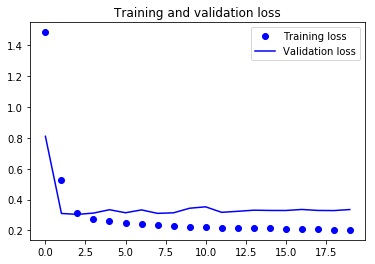

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

A first recurrent baseline.

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 138s 275ms/step - loss: 0.3011 - val_loss: 0.2680
Epoch 2/20
500/500 [==============================] - 136s 271ms/step - loss: 0.2850 - val_loss: 0.2787
Epoch 3/20
500/500 [==============================] - 135s 270ms/step - loss: 0.2800 - val_loss: 0.2647
Epoch 4/20
500/500 [==============================] - 135s 270ms/step - loss: 0.2735 - val_loss: 0.2690
Epoch 5/20
500/500 [==============================] - 135s 271ms/step - loss: 0.2679 - val_loss: 0.2610
Epoch 6/20
500/500 [==============================] - 137s 274ms/step - loss: 0.2637 - val_loss: 0.2587
Epoch 7/20
500/500 [==============================] - 135s 270ms/step - loss: 0.2595 - val_loss: 0.2612
Epoch 8/20
500/500 [==============================] - 138s 275ms/step - loss: 0.2534 - val_loss: 0.2629
Epoch 9/20
500/500 [==============================] - 135s 271ms/step - loss: 0.2487 - val_loss: 0.2637
Epoch 10/20
500/500 [==============================] - 135s 271m

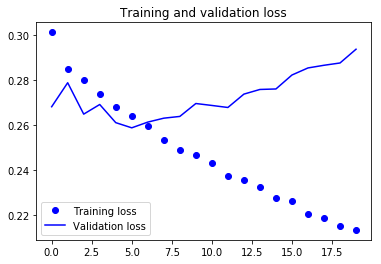

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using recurrent dropout to fight overfitting.

In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 157s 315ms/step - loss: 0.3347 - val_loss: 0.2777
Epoch 2/40
500/500 [==============================] - 157s 315ms/step - loss: 0.3163 - val_loss: 0.2762
Epoch 3/40
500/500 [==============================] - 158s 316ms/step - loss: 0.3089 - val_loss: 0.2735
Epoch 4/40
500/500 [==============================] - 159s 317ms/step - loss: 0.3033 - val_loss: 0.2663
Epoch 5/40
500/500 [==============================] - 159s 317ms/step - loss: 0.3002 - val_loss: 0.2715
Epoch 6/40
500/500 [==============================] - 159s 318ms/step - loss: 0.2972 - val_loss: 0.2686
Epoch 7/40
500/500 [==============================] - 158s 316ms/step - loss: 0.2938 - val_loss: 0.2731
Epoch 8/40
500/500 [==============================] - 157s 315ms/step - loss: 0.2936 - val_loss: 0.2728
Epoch 9/40
500/500 [==============================] - 156s 313ms/step - loss: 0.2934 - val_loss: 0.2704
Epoch 10/40
500/500 [==============================] - 156s 313m

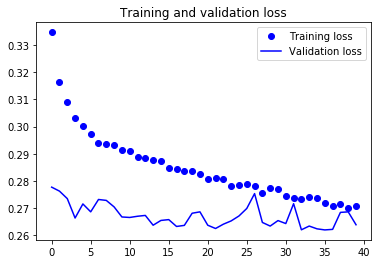

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Stacking recurrent layers.

In [29]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 343s 685ms/step - loss: 0.3356 - val_loss: 0.2802
Epoch 2/40
500/500 [==============================] - 342s 684ms/step - loss: 0.3128 - val_loss: 0.2754
Epoch 3/40
500/500 [==============================] - 342s 684ms/step - loss: 0.3089 - val_loss: 0.2740
Epoch 4/40
500/500 [==============================] - 343s 685ms/step - loss: 0.3042 - val_loss: 0.2746
Epoch 5/40
500/500 [==============================] - 343s 686ms/step - loss: 0.3003 - val_loss: 0.2670
Epoch 6/40
500/500 [==============================] - 342s 684ms/step - loss: 0.2947 - val_loss: 0.2642
Epoch 7/40
500/500 [==============================] - 342s 684ms/step - loss: 0.2926 - val_loss: 0.2660
Epoch 8/40
500/500 [==============================] - 342s 684ms/step - loss: 0.2884 - val_loss: 0.2670
Epoch 9/40
500/500 [==============================] - 343s 685ms/step - loss: 0.2872 - val_loss: 0.2636
Epoch 10/40
500/500 [==============================] - 342s 685m

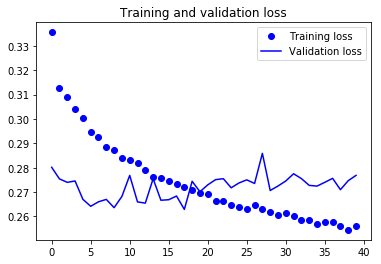

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using bidirectional RNNs.

In [31]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
    
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [32]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 136s 272ms/step - loss: 0.4715 - val_loss: 0.4876
Epoch 2/20
500/500 [==============================] - 136s 271ms/step - loss: 0.4419 - val_loss: 0.4772
Epoch 3/20
500/500 [==============================] - 136s 271ms/step - loss: 0.4033 - val_loss: 0.4674
Epoch 4/20
500/500 [==============================] - 136s 271ms/step - loss: 0.3598 - val_loss: 0.4515
Epoch 5/20
500/500 [==============================] - 136s 271ms/step - loss: 0.3314 - val_loss: 0.4696
Epoch 6/20
500/500 [==============================] - 136s 272ms/step - loss: 0.3160 - val_loss: 0.4553
Epoch 7/20
500/500 [==============================] - 136s 271ms/step - loss: 0.3042 - val_loss: 0.4593
Epoch 8/20
500/500 [==============================] - 136s 272ms/step - loss: 0.2926 - val_loss: 0.4759
Epoch 9/20
500/500 [==============================] - 136s 272ms/step - loss: 0.2848 - val_loss: 0.4676
Epoch 10/20
500/500 [==============================] - 136s 272m

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Revese ordering did not work well; but this does not mean the ordering is useless.

Let's check IMDB case.

In [33]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.4910 - acc: 0.7676 - val_loss: 0.3885 - val_acc: 0.8582
Epoch 2/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.3115 - acc: 0.8790 - val_loss: 0.3364 - val_acc: 0.8668
Epoch 3/10
20000/20000 [==============================] - 95s 5ms/step - loss: 0.2529 - acc: 0.9055 - val_loss: 0.3808 - val_acc: 0.8330
Epoch 4/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.2247 - acc: 0.9192 - val_loss: 0.3856 - val_acc: 0.8664
Epoch 5/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1915 - acc: 0.9332 - val_loss: 0.5108 - val_acc: 0.8228
Epoch 6/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1695 - acc: 0.9394 - val_loss: 0.3518 - val_acc: 0.8614
Epoch 7/10
20000/20000 [==============================] - 94s 5ms/step - loss: 0.1575 - acc: 0.9474 - val_loss: 0.4825 - val_acc:

Bidirectional LSTM.

In [34]:
from keras import backend as K
K.clear_session()

In [35]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.5556 - acc: 0.7192 - val_loss: 0.5084 - val_acc: 0.7482
Epoch 2/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.3285 - acc: 0.8737 - val_loss: 0.3308 - val_acc: 0.8866
Epoch 3/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.2659 - acc: 0.9037 - val_loss: 0.4739 - val_acc: 0.8612
Epoch 4/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.2293 - acc: 0.9187 - val_loss: 0.3520 - val_acc: 0.8716
Epoch 5/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.2037 - acc: 0.9273 - val_loss: 0.3261 - val_acc: 0.8816
Epoch 6/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.1820 - acc: 0.9358 - val_loss: 0.4376 - val_acc: 0.8540
Epoch 7/10
20000/20000 [==============================] - 166s 8ms/step - loss: 0.1694 - acc: 0.9414 - val_loss: 0.3751 - v

Bidirectional GRU for the climate data.

In [36]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2930 - val_loss: 0.2739
Epoch 2/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2743 - val_loss: 0.2730
Epoch 3/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2667 - val_loss: 0.2699
Epoch 4/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2628 - val_loss: 0.2707
Epoch 5/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2553 - val_loss: 0.2728
Epoch 6/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2489 - val_loss: 0.2726
Epoch 7/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2448 - val_loss: 0.2790
Epoch 8/40
500/500 [==============================] - 264s 528ms/step - loss: 0.2394 - val_loss: 0.2822
Epoch 9/40
500/500 [==============================] - 264s 527ms/step - loss: 0.2326 - val_loss: 0.2805
Epoch 10/40
500/500 [==============================] - 264s 527m